In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
data = pd.read_csv('Banknote-authentication-dataset.csv')

In [27]:
X = data[['V1', 'V2']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

In [29]:
import matplotlib.pyplot as plt

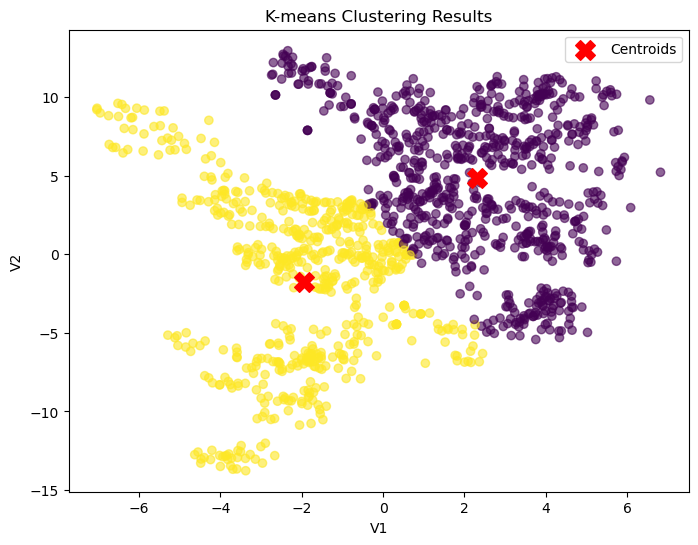

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(data['V1'], data['V2'], c=data['Cluster'], cmap='viridis', alpha=0.6)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

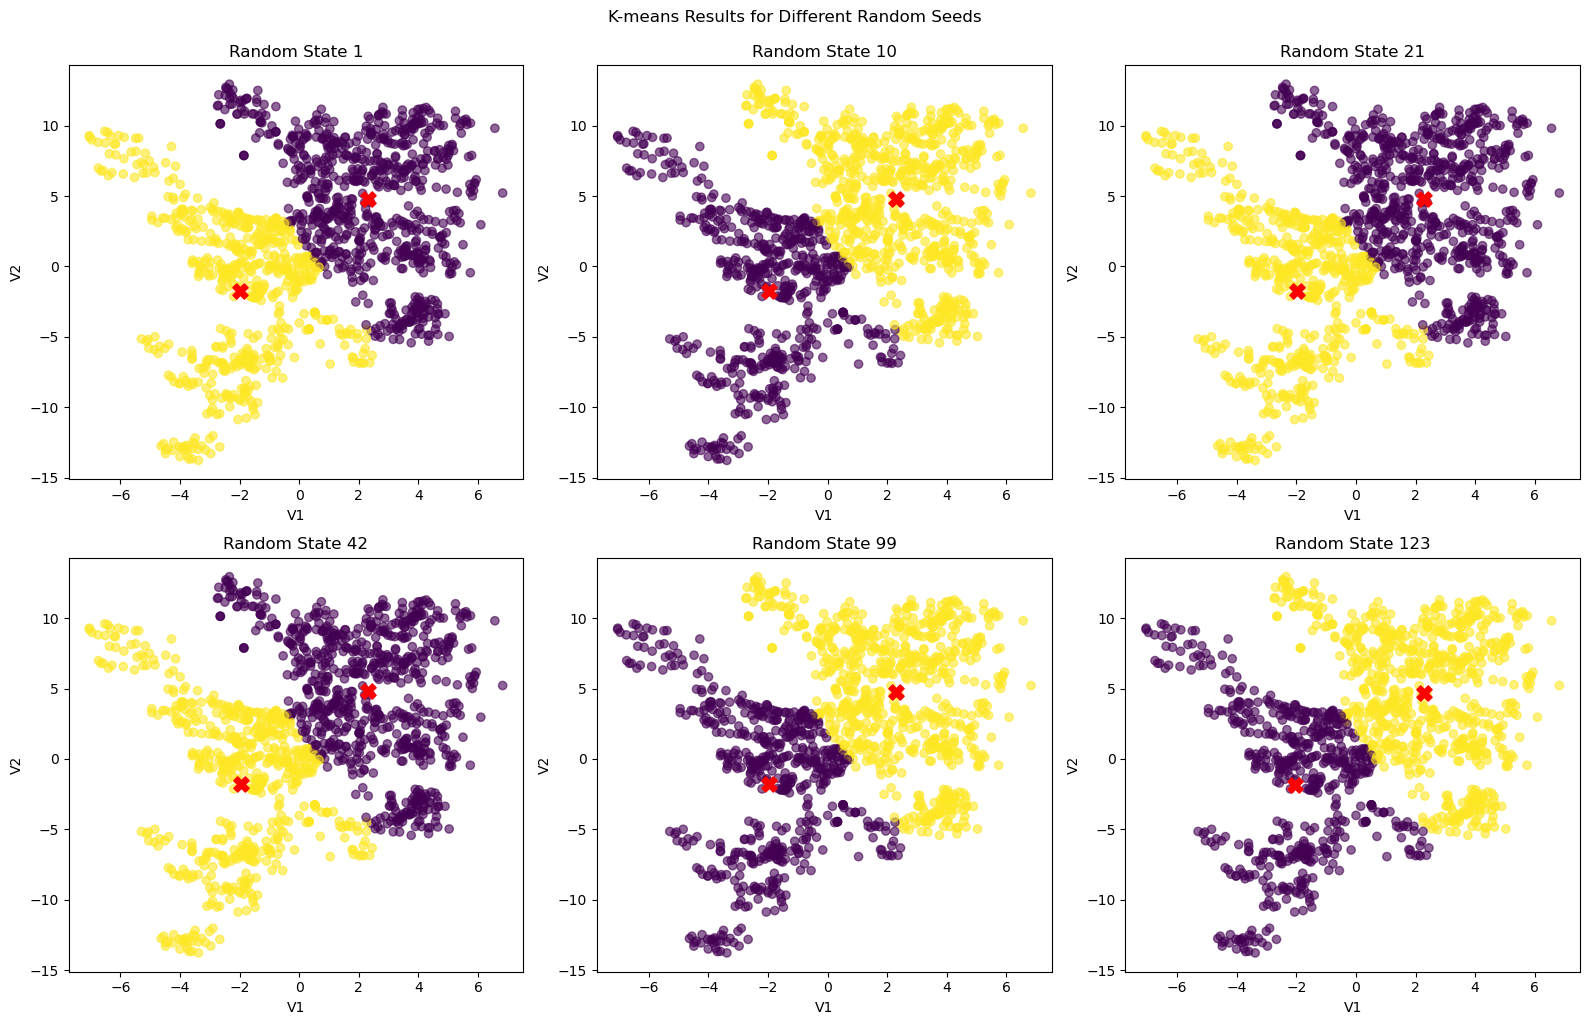

In [31]:
n_runs = 5
plt.figure(figsize=(16, 10))
for i, seed in enumerate([1, 10, 21, 42, 99, 123], 1):
    kmeans = KMeans(n_clusters=2, random_state=seed)
    clusters = kmeans.fit_predict(X_scaled)
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.subplot(2, 3, i)
    plt.scatter(data['V1'], data['V2'], c=clusters, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=120, c='red', marker='X', label='Centroids')
    plt.title(f'Random State {seed}')
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.tight_layout()
plt.suptitle('K-means Results for Different Random Seeds', y=1.02)
plt.show()

In [32]:
all_clusters = []
seeds = [1, 10, 21, 42, 99, 123]
for seed in seeds:
    kmeans = KMeans(n_clusters=2, random_state=seed)
    clusters = kmeans.fit_predict(X_scaled)
    all_clusters.append(clusters)

for i in range(len(all_clusters)):
    for j in range(i+1, len(all_clusters)):
        diff = (all_clusters[i] != all_clusters[j]).sum()
        print(f"Difference in labels between run {seeds[i]} and {seeds[j]}: {diff} points")

Difference in labels between run 1 and 10: 1372 points
Difference in labels between run 1 and 21: 1 points
Difference in labels between run 1 and 42: 0 points
Difference in labels between run 1 and 99: 1371 points
Difference in labels between run 1 and 123: 1365 points
Difference in labels between run 10 and 21: 1371 points
Difference in labels between run 10 and 42: 1372 points
Difference in labels between run 10 and 99: 1 points
Difference in labels between run 10 and 123: 7 points
Difference in labels between run 21 and 42: 1 points
Difference in labels between run 21 and 99: 1372 points
Difference in labels between run 21 and 123: 1366 points
Difference in labels between run 42 and 99: 1371 points
Difference in labels between run 42 and 123: 1365 points
Difference in labels between run 99 and 123: 6 points
